##### Project WOW Tessellation Code

We are going to use an OOP approach utilizing two main classes First, we will have an antenna class which will contain the radiation pattern of each of antenna assigned to a station. Secondly, we will have a station class which will contain information such as the station name and type. This allows us to rapidly create new stations and assign new antennas to that station. 


In [2]:
import pandas as pd
import numpy as np
import math 
from scipy import spatial
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


class Station:
    def __init__(self,name,lat,long):
        self.name = name #Station name - string
        self.lat = lat # Latitude of the station - float 
        self.long = long # Longitude of the station - float
        self.antennas = [] #list of antennas to store antenna objects assigned to the station
    def add_antenna(self, antenna):
        #check if the item we are adding to the antenna list is an antenna, and then add it to the antenna list
        #return an error if the item is invalid. 
        if isinstance(antenna, Antenna):
            self.antennas.append(antenna)
            print(f"{antenna.name} added to {self.name}'s antennas.")
        else:
            print("Invalid antenna object. Please provide an Antenna instance.")
    def list_antennas(self):
        #mostly meant for debugging and information
        #simply iterates over the antennas added to the antenna list and prints the name of the antenna and the frequency 
        print(f"{self.name}'s antennas:")
        for antenna in self.antennas:
            print(f"{antenna.name} ({antenna.frequency} MHz)")
    def provide_boundary(self,antenna_number,RSSI_Thresh,offset_X = 0, offset_Y = 0,offset_Z = 0):
        #antenna_number - int - which antenna number are we generating a geometry for?
        #RSSI_Thresh - int - the RSSI (dBm) of the detection we are looking to generate a border for
        #offset_X - float - the East-West offset from the reference station in meters. Default is 0m
        #offset_Y - float - the North-South offset from the referecne station in meters. Default is 0m 
        
        xy = self.antennas[antenna_number].rad_pattern[self.antennas[antenna_number].rad_pattern.RSSI == RSSI_Thresh]
        
        x = xy.X - offset_X
        y = xy.Y - offset_Y
        z = xy.Z - offset_Z
        xyz = np.column_stack((np.array(x).T,np.array(y).T,np.array(z).T))
        
        hull = spatial.ConvexHull(xyz, incremental=False, qhull_options='Qt')
        hull_indices = hull.vertices
        
        #the below can be optimized
        boundary_x = []
        boundary_y = []
        boundary_z = []
        for i in range(len(hull_indices)):
            index = hull_indices[i]
            boundary_x.append(xyz[index, 0].astype('float64'))
            boundary_y.append(xyz[index, 1].astype('float64'))
            boundary_z.append(xyz[index, 2].astype('float64'))
        # return a Nx3 numpy array with the points which make the complex hull (boundary) of points which contain the
        # points with a signal strength greater than or equal to the threshold 
        return np.column_stack((np.array(boundary_x).T,np.array(boundary_y).T,np.array(boundary_z).T))

class Antenna: 
    def __init__(self,name,ant_type,orientation,freq):
        self.name = name #string
        self.ant_type = ant_type #antenna type, generally yagi or omni 
        self.orientation = orientation # in units of degrees, 0 degrees is North 
        self.frequency = freq # frequency is megahertz 
    def assign_pattern(self,pattern):
        # the pattern variable is going to be a pandas dataframe read in from our calibration data
        # Define the rotation angle in degrees,use zero for an omni
        theta = self.orientation

        # Convert degrees to radians
        theta = np.deg2rad(theta)

        # Calculate sine and cosine of the rotation angle
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)

        # Apply rotation matrix to X and Y
        new_x = pattern['X'] * cos_theta - pattern['Y'] * sin_theta
        new_y = pattern['X'] * sin_theta + pattern['Y'] * cos_theta
        
        rotated_df = pd.DataFrame({'X': new_x,'Y': new_y,'Z': pattern['Z'],'RSSI': pattern['RSSI']})

        self.rad_pattern = rotated_df
    def convert_to_lat_long(self,station):
        # Earth radius (mean radius in meters)
        earth_radius = 6371000  # Approximate value for the Earth's mean radius

        # Convert station's latitude and longitude from degrees to radians
        lat1 = math.radians(station.lat)
        lon1 = math.radians(station.long)

        # Calculate new latitude and longitude using DataFrame columns
        lat2 = lat1 + (self.rad_pattern['Y']/ earth_radius)
        lon2 = lon1 + (self.rad_pattern['X'] / (earth_radius * math.cos(lat1)))
        # Convert back to degrees and add the results as new columns
        self.rad_pattern['Latitude'] = np.degrees(lat2)
        self.rad_pattern['Longitude'] = np.degrees(lon2)

In [2]:
# just a test 
home_station = Station('home',41.642391, -71.544212)

In [4]:
import sys

# Get a list of packages being used by the notebook
packages = [package.split('==')[0] for package in sys.modules.keys() if hasattr(sys.modules[package], '__version__')]

# Remove duplicates
packages = list(set(packages))

In [1]:
import cupy

In [2]:
pip show cupy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip freeze

ansi2html==1.8.0
aplpy==2.1.0
appdirs==1.4.4
apt-xapian-index==0.49
argon2-cffi==21.1.0
astropy==5.2
astropy-healpix==0.6
astroquery==0.4.6
attrs==21.2.0
awscli==1.22.34
Babel==2.8.0
backcall==0.2.0
backports.shutil-get-terminal-size==1.0.0
bdsf==1.10.2
beautifulsoup4==4.10.0
beniget==0.4.1
big-O==0.11.0
bleach==4.1.0
blessings==1.7
blinker==1.6.3
botocore==1.23.34
Brotli==1.0.9
bs4==0.0.1
casadata==2023.4.10
casatasks==6.6.0.20
casatools==6.6.0.20
casaviewer==0.0.0.2
cc1101-python==1.3.1
certifi==2020.6.20
cffi==1.15.1
chardet==4.0.0
click==8.1.7
cloudpickle==3.0.0
colorama==0.4.4
comm==0.2.1
command-not-found==0.3
cryptography==40.0.2
cssselect==1.1.0
cupshelpers==1.0
cupy-cuda11x==12.2.0
cycler==0.11.0
Cython==0.29.32
dash==2.14.1
dash-core-components==2.0.0
dash-html-components==2.0.0
dash-table==5.0.0
dask==2023.12.0
dbus-python==1.2.18
debugpy==1.8.0
decorator==4.4.2
deepdiff==5.8.1
defusedxml==0.7.1
distro==1.7.0
distro-info==1.1+ubuntu0.2
docutils==0.17.1
entrypoints==0.4
et-xm

In [3]:
# creating four bullshit antennas to assign to the bullshit station

SEL_Comp_Data = pd.read_csv('final_SEL_composite_data_upd17.csv')

a1 = Antenna('1','yagi',0,434)
a1.assign_pattern(SEL_Comp_Data)
a1.convert_to_lat_long(home_station)

a2 = Antenna('2','yagi',90,434)
a2.assign_pattern(SEL_Comp_Data)
a2.convert_to_lat_long(home_station)

a3 = Antenna('3','yagi',180,434)
a3.assign_pattern(SEL_Comp_Data)
a3.convert_to_lat_long(home_station)

a4 = Antenna('4','yagi',270,434)
a4.assign_pattern(SEL_Comp_Data)
a4.convert_to_lat_long(home_station)


In [4]:
home_station.add_antenna(a1)
home_station.add_antenna(a2)
home_station.add_antenna(a3)
home_station.add_antenna(a4)

1 added to home's antennas.
2 added to home's antennas.
3 added to home's antennas.
4 added to home's antennas.


In [5]:
home_station.list_antennas()

home's antennas:
1 (434 MHz)
2 (434 MHz)
3 (434 MHz)
4 (434 MHz)


In [6]:
home_station.antennas[0].rad_pattern

,X,Y,Z,RSSI,Latitude,Longitude
0,5020.867456,-1752.310126,-39.9,-94.0,41.626632,-71.483790
1,5020.598333,-1751.659570,-39.9,-90.0,41.626638,-71.483793
2,5020.594491,-1751.513529,-39.9,-106.0,41.626639,-71.483793
3,5020.956576,-1749.311878,-39.9,-107.0,41.626659,-71.483789
4,5021.294274,-1749.376064,-39.9,-107.0,41.626658,-71.483785
...,...,...,...,...,...,...
77807,16781.424347,-7123.451581,759.4,-102.0,41.578328,-71.342261
77808,17019.955895,-7230.010327,750.8,-98.0,41.577370,-71.339391
77809,17059.376498,-7247.359652,749.8,-103.0,41.577214,-71.338917
77810,17178.502677,-7298.545849,746.6,-108.0,41.576754,-71.337483


In [7]:
#Setup each of the actual stations

SEL_Station = Station('SEL',41.1534, -71.5521)
SEL_Comp_Data = pd.read_csv('final_SEL_composite_data_upd17.csv')


a1 = Antenna('1','yagi',17,434)
a1.assign_pattern(SEL_Comp_Data)
a1.convert_to_lat_long(home_station)

a2 = Antenna('2','yagi',17+90,434)
a2.assign_pattern(SEL_Comp_Data)
a2.convert_to_lat_long(home_station)

a3 = Antenna('3','yagi',180+17,434)
a3.assign_pattern(SEL_Comp_Data)
a3.convert_to_lat_long(home_station)

a4 = Antenna('4','yagi',270+17,434)
a4.assign_pattern(SEL_Comp_Data)
a4.convert_to_lat_long(home_station)

SEL_Station.add_antenna(a1)
SEL_Station.add_antenna(a2)
SEL_Station.add_antenna(a3)
SEL_Station.add_antenna(a4)

1 added to SEL's antennas.
2 added to SEL's antennas.
3 added to SEL's antennas.
4 added to SEL's antennas.


In [8]:
BRR_Station = Station('BRR',41.1479, -71.5521)
BRR_Comp_Data = pd.read_csv('final_BRR_composite_data_upd68.csv')


a1 = Antenna('1','yagi',0+68,434)
a1.assign_pattern(BRR_Comp_Data)
a1.convert_to_lat_long(BRR_Station)

a2 = Antenna('2','yagi',90+68,434)
a2.assign_pattern(BRR_Comp_Data)
a2.convert_to_lat_long(BRR_Station)

a3 = Antenna('3','yagi',180+68,434)
a3.assign_pattern(BRR_Comp_Data)
a3.convert_to_lat_long(BRR_Station)

a4 = Antenna('4','yagi',270+68,434)
a4.assign_pattern(BRR_Comp_Data)
a4.convert_to_lat_long(BRR_Station)

BRR_Station.add_antenna(a1)
BRR_Station.add_antenna(a2)
BRR_Station.add_antenna(a3)
BRR_Station.add_antenna(a4)

1 added to BRR's antennas.
2 added to BRR's antennas.
3 added to BRR's antennas.
4 added to BRR's antennas.


In [9]:
MON_Station = Station('MON',41.1534, -71.5521)
MON_Comp_Data = pd.read_csv('final_MON_composite_data_upd80.csv')


a1 = Antenna('1','yagi',0+80,434)
a1.assign_pattern(MON_Comp_Data)
a1.convert_to_lat_long(MON_Station)

a2 = Antenna('2','yagi',90+80,434)
a2.assign_pattern(SEL_Comp_Data)
a2.convert_to_lat_long(MON_Station)

a3 = Antenna('3','yagi',180+80,434)
a3.assign_pattern(SEL_Comp_Data)
a3.convert_to_lat_long(MON_Station)

a4 = Antenna('4','yagi',270+80,434)
a4.assign_pattern(SEL_Comp_Data)
a4.convert_to_lat_long(MON_Station)

MON_Station.add_antenna(a1)
MON_Station.add_antenna(a2)
MON_Station.add_antenna(a3)
MON_Station.add_antenna(a4)

1 added to MON's antennas.
2 added to MON's antennas.
3 added to MON's antennas.
4 added to MON's antennas.


In [10]:
#Let us start working some geometries

df = pd.read_csv('allTagsAll390.csv',low_memory=False)

#BIWF goes offline on 11-29-2021
#SE Light goes offline on 12-25-2021
#Black Rock Goes offline on 5-26-2022



#remove any detections from the MOTUS project which are detected after the stations came down 
df['ts'] = pd.to_datetime(df['ts'])
df1 = df[df['ts'] < pd.to_datetime('2022-05-26')]

#filter just our recievers
mask = (df1['recvDeployName'] == 'Black_Rock_434') | (df1['recvDeployName'] == 'SE_Light_434') | (df1['recv'] == 'CTT-6A8468DA84C0')

#BIT is the Block Island Turbine
df_Black_Rock = df1[df1['recvDeployName'] == 'Black_Rock_434'].reset_index()
df_SE_Light = df1[df1['recvDeployName'] == 'SE_Light_434'].reset_index()
df_BIT = df1[df1['recv'] == 'CTT-6A8468DA84C0'].reset_index()

In [11]:
#We are going to start trying to locate some of the target species that we know were tagged. Pam informed me that
#there was a signular falcon which was double tagged that traveled through our station coverage area. 

df_BR_Falcon = df_Black_Rock[df_Black_Rock['speciesEN'] == 'Peregrine Falcon'].reset_index()
df_SE_Light_Falcon = df_SE_Light[df_SE_Light['speciesEN'] == 'Peregrine Falcon'].reset_index()
df_BIT_Falcon = df_BIT[df_BIT['speciesEN'] == 'Peregrine Falcon'].reset_index()

In [43]:
#combine_simultaneous_timestamps in takes the time stamps from the detection data frames (i.e df_BR_Falcon)
# and looks to see if there are at least 3 simulatenous detections. Note that there can be more than one detection 
#from a given station. For example Station A has detections on Port 1 & 2 and Station B has detections on Port 4, 
#this would qualify as having three simultaneous detections

#add a little bit of commenting here
def combine_simultaneous_timestamps(*timestamp_lists):
    combined_timestamps = {}
    
    for list_index, timestamps in enumerate(timestamp_lists):
        for index, timestamp in enumerate(timestamps):
            if timestamp in combined_timestamps:
                combined_timestamps[timestamp].append((list_index, index))
            else:
                combined_timestamps[timestamp] = [(list_index, index)]
    filtered_combined_timestamps = {timestamp: indexes for timestamp, indexes in combined_timestamps.items() if len(indexes) > 2}

    return filtered_combined_timestamps

# Example lists of time stamps
list1 = list(df_BIT_Falcon['tsCorrected'])
list2 = list(df_SE_Light_Falcon['tsCorrected'])
list3 = list(df_BR_Falcon['tsCorrected'])

combined = combine_simultaneous_timestamps(list1,list2, list3)
#the below is read [Unix time :(list number, index in that list)]
#uncommenting .keys just gives the unix time where multiple detections were found
combined#.keys()

{1633870798.0: [(0, 4), (2, 385), (2, 386), (2, 387), (2, 388)],
 1633962325.0: [(1, 1), (2, 1032), (2, 1033)],
 1633816172.0: [(2, 21), (2, 22), (2, 23), (2, 24), (2, 25)],
 1633816177.0: [(2, 26), (2, 27), (2, 28), (2, 29)],
 1633816182.0: [(2, 30), (2, 31), (2, 32)],
 1633816228.0: [(2, 38), (2, 39), (2, 40)],
 1633816233.0: [(2, 41), (2, 42), (2, 43), (2, 44)],
 1633816239.0: [(2, 45), (2, 46), (2, 47), (2, 48)],
 1633816244.0: [(2, 49), (2, 50), (2, 51)],
 1633816249.0: [(2, 52), (2, 53), (2, 54)],
 1633816254.0: [(2, 55), (2, 56), (2, 57)],
 1633816259.0: [(2, 58), (2, 59), (2, 60), (2, 61), (2, 62)],
 1633816264.0: [(2, 63), (2, 64), (2, 65), (2, 66), (2, 67)],
 1633816269.0: [(2, 68), (2, 69), (2, 70), (2, 71), (2, 72)],
 1633816275.0: [(2, 73), (2, 74), (2, 75), (2, 76), (2, 77)],
 1633816296.0: [(2, 78), (2, 79), (2, 80), (2, 81)],
 1633816301.0: [(2, 82), (2, 83), (2, 84), (2, 85), (2, 86)],
 1633816319.0: [(2, 87), (2, 88), (2, 89), (2, 90), (2, 91)],
 1633816336.0: [(2, 92

In [47]:
len(list3)

1063

In [13]:
# let us just take a random example and make a tesselated geometry. Let us just use the first entry

a = combined[list(combined.keys())[0]]
key_list = list(combined.keys())
for i in range(len(a)):
    if a[i][0] == 0:
        data_column_rows = df_SE_Light_Falcon[df_SE_Light_Falcon.tsCorrected == key_list[i]]
        data_SEL = []
        for index,row in data_column_rows.iterrows():
            data_SEL.append([row['port'],row['sig']])    
    if a[i][0] == 1:
        data_column_rows = df_BR_Falcon[df_BR_Falcon.tsCorrected == key_list[i]]
        data_BR = []
        for index,row in data_column_rows.iterrows():
            data_BR.append([row['port'],row['sig']])

In [14]:
#what are the ports of the Black Rock station that had detections at this time
data_BR

[['L3', -97.0], ['L5', -98.0], ['L2', -98.0], ['L4', -99.0]]

In [15]:
#what are the ports of the Southeast Light station that had detections at this time
data_SEL

[['L1', -88.0]]

In [16]:
a

[(0, 1), (1, 1032), (1, 1033)]

In [17]:
data_BR

[['L3', -97.0], ['L5', -98.0], ['L2', -98.0], ['L4', -99.0]]

In [18]:
BRR_Station.antennas[2].rad_pattern[BRR_Station.antennas[2].rad_pattern.RSSI == -97]


,X,Y,Z,RSSI,Latitude,Longitude
16,3683.221321,-3837.603645,-39.9,-97.0,41.113388,-71.508111
39,3685.183441,-3833.683754,-39.9,-97.0,41.113423,-71.508088
53,3690.793740,-3840.647860,-39.9,-97.0,41.113360,-71.508021
63,3688.011201,-3841.020503,-39.9,-97.0,41.113357,-71.508054
72,3681.385388,-3837.942099,-39.9,-97.0,41.113385,-71.508133
...,...,...,...,...,...,...
77686,6816.695611,-8480.822472,892.0,-97.0,41.071630,-71.470688
77689,6937.488413,-8595.037269,892.2,-97.0,41.070603,-71.469246
77782,10600.247063,-12532.368933,809.6,-97.0,41.035194,-71.425502
77797,11153.140724,-13225.752559,788.0,-97.0,41.028958,-71.418898


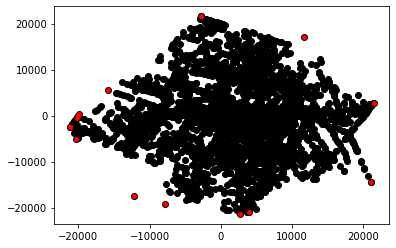

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial

#plot all of the points where the RSSI of the black rock station is equal to -97 dBm (black)
#find the boundary points (red) 




#xy = np.loadtxt('xy.txt')
x = BRR_Station.antennas[2].rad_pattern[BRR_Station.antennas[2].rad_pattern.RSSI == -97].X
y = BRR_Station.antennas[2].rad_pattern[BRR_Station.antennas[2].rad_pattern.RSSI == -97].Y

xy = np.column_stack((np.array(x).T,np.array(y).T))

hull = spatial.ConvexHull(xy, incremental=False, qhull_options='Qt')
hull_indices = hull.vertices

boundary_x = []
boundary_y = []

for i in range(len(hull_indices)):
    index = hull_indices[i]
    boundary_x.append(xy[index, 0].astype('float64'))
    boundary_y.append(xy[index, 1].astype('float64'))

plt.plot(x, y, 'o', color='black', markersize=6)
plt.plot(boundary_x, boundary_y, 'o', color='red', markersize=4)

plt.show()

In [20]:
np.column_stack((np.array(x).T,np.array(y).T))

array([[  3683.2213209 ,  -3837.60364485],
       [  3685.18344096,  -3833.68375409],
       [  3690.7937398 ,  -3840.64786046],
       ...,
       [ 10600.2470628 , -12532.36893294],
       [ 11153.14072387, -13225.75255897],
       [ 11341.61625879, -13475.82641104]])

In [21]:
BRR_Station.antennas[2].rad_pattern[BRR_Station.antennas[2].rad_pattern.RSSI == -97].X

16        3683.221321
39        3685.183441
53        3690.793740
63        3688.011201
72        3681.385388
             ...     
77686     6816.695611
77689     6937.488413
77782    10600.247063
77797    11153.140724
77801    11341.616259
Name: X, Length: 5407, dtype: float64

In [22]:
#okay back to the ranch, find the boundaries for each of the ports and their respective RSSI, we will use the 
#black rock station as our reference station. 

a2 = BRR_Station.provide_boundary(1,-98)
a3 = BRR_Station.provide_boundary(2,-97)
a4 = BRR_Station.provide_boundary(3,-99)
a5 = SEL_Station.provide_boundary(0,-88,0,611)

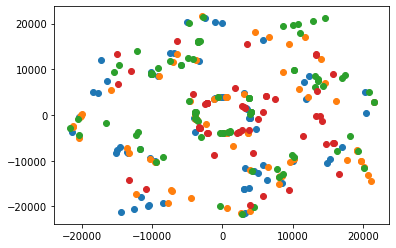

In [23]:
#plot each of the geometries. each one will have a different color. XY axis are in meters. 

plt.scatter(a2[:,0],a2[:,1])
plt.scatter(a3[:,0],a3[:,1])
plt.scatter(a4[:,0],a4[:,1])
plt.scatter(a5[:,0],a5[:,1])


In [24]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

def is_point_inside_hull(hull_vertices, point):
    hull_polygon = Polygon(hull_vertices)
    point = Point(point)
    return hull_polygon.contains(point)

def indices_where_all_true(*lists):
    return [i for i, values in enumerate(zip(*lists)) if all(values)]

# Define the range for x and y values
x_values_hull = np.concatenate((a2[:,0],a3[:,0],a4[:,0],a5[:,0]))
y_values_hull = np.concatenate((a2[:,1],a3[:,1],a4[:,1],a5[:,1]))
z_values_hull = np.concatenate((a2[:,2],a3[:,2],a4[:,2],a5[:,2]))

x_min, x_max = np.min(x_values_hull), np.max(x_values_hull)
y_min, y_max = np.min(y_values_hull), np.max(y_values_hull)
z_min, z_max = np.min(z_values_hull), np.max(z_values_hull)

# Generate 1e5 (100,000) random 2D points
num_points = int(1e5)
x_values = np.random.uniform(x_min, x_max, num_points)
y_values = np.random.uniform(y_min, y_max, num_points)
z_values = np.random.uniform(z_min, z_max, num_points)

# Combine x and y values into 2D points
points = np.column_stack((x_values, y_values,z_values))

# Example usage:
#hull_vertices = [(0, 0), (0, 1), (1, 1), (1, 0)]
#point_to_check = (25000, 0.5)

result_list_2 = [is_point_inside_hull(a2, x) for x in points]
result_list_3 = [is_point_inside_hull(a3, x) for x in points]
result_list_4 = [is_point_inside_hull(a4, x) for x in points]
result_list_5 = [is_point_inside_hull(a5, x) for x in points]

index_map = indices_where_all_true(result_list_2,result_list_3,result_list_4,result_list_5)


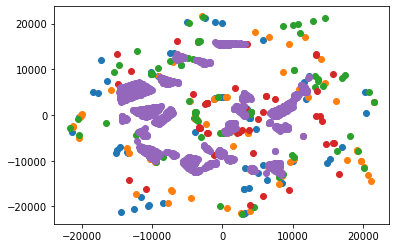

In [25]:
plt.scatter(a2[:,0],a2[:,1])
plt.scatter(a3[:,0],a3[:,1])
plt.scatter(a4[:,0],a4[:,1])
plt.scatter(a5[:,0],a5[:,1])

plt.scatter(points[index_map][:,0],points[index_map][:,1])

In [26]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Performing K-means clustering
num_clusters = 23
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(points[index_map])



/home/main/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
labels

array([12,  3, 22, ...,  7, 14,  7], dtype=int32)

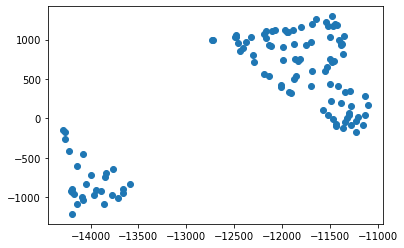

In [28]:
plt.scatter(points[index_map][labels==0][:,0],points[index_map][labels==0][:,1])

In [29]:
for i in range(23):
    g0 = points[index_map][labels==i]
    hull = spatial.ConvexHull(g0, incremental=False, qhull_options='Qt')
    r = ((hull.volume * 3/4)/np.pi)**(1/3)
    print(r)

1114.2963890999781
1002.8794056053222
665.7512929404608
1255.2318569980198
569.2392043841614
1171.2886272982541
1179.8813076348372
866.2067810932025
752.1444180814436
826.8683373216912
720.4721599772935
639.9511821692756
1210.3391335199776
825.8697852481566
1214.4415909138381
1010.3465789376033
994.0943350528034
375.28417104502125
994.3570945414338
803.0838848282103
641.9038860939194
834.2917127764151
932.6882650199279


In [30]:
r

932.6882650199279

In [31]:
points[index_map]

array([[-13648.24452037,   5407.47623075,    550.48735856],
       [-11705.94016157,  -6960.03235178,    625.61743013],
       [ -7742.28294426,   -164.55730994,    910.59610909],
       ...,
       [  8270.33996873,   1137.71710256,   1127.42813633],
       [ -4554.06511345, -10542.4279274 ,    -24.50408271],
       [  8671.95762802,    948.94281847,    350.05069943]])

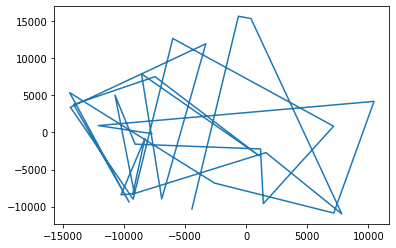

In [32]:
boundary_x = []
boundary_y = []
boundary_z = []

hull_indices = hull.vertices


for i in range(len(hull_indices)):
    index = hull_indices[i]
    boundary_x.append(points[index_map][index, 0].astype('float64'))
    boundary_y.append(points[index_map][index, 1].astype('float64'))
    boundary_z.append(points[index_map][index, 2].astype('float64'))
plt.plot(boundary_x, boundary_y)

plt.show()

In [33]:
hull.volume
#338 square miles 

3398585083.598721

In [34]:
np.sqrt(338/np.pi) 

10.37249929043725

In [35]:
BRR_Station.antennas[0].rad_pattern[BRR_Station.antennas[0].rad_pattern.RSSI == -98]

,X,Y,Z,RSSI,Latitude,Longitude
12,-3680.368583,3837.538188,-39.9,-98.0,41.182412,-71.596055
19,-3683.825977,3836.920864,-39.9,-98.0,41.182406,-71.596096
34,-3684.610223,3834.300602,-39.9,-98.0,41.182383,-71.596105
61,-3688.523265,3841.507439,-39.9,-98.0,41.182448,-71.596152
68,-3685.358291,3839.755541,-39.9,-98.0,41.182432,-71.596114
...,...,...,...,...,...,...
77778,-10460.075606,12351.584104,814.8,-98.0,41.258980,-71.677024
77785,-10709.317761,12674.231516,807.4,-98.0,41.261882,-71.680001
77788,-10820.024095,12816.867212,802.8,-98.0,41.263165,-71.681323
77806,-11664.573480,13896.471254,762.0,-98.0,41.272874,-71.691410
